# Regression Models

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-seattle/train.csv
/kaggle/input/house-price-prediction-seattle/test.csv


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


## Data Reading

In [13]:
train = pd.read_csv("/kaggle/input/house-price-prediction-seattle/train.csv")
test = pd.read_csv("/kaggle/input/house-price-prediction-seattle/test.csv")


## Data Exploration

In [14]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [15]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [18]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [19]:
test.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


## Data Cleaning

### Checking consistency in units based data

In [24]:
train['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

In [25]:
test['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

In [26]:
train['size_units'].unique()

array(['sqft'], dtype=object)

In [27]:
test['size_units'].unique()

array(['sqft'], dtype=object)

### Dealing with Inconsistency in lot_size and lot_size_unit
As data is stored by acres and sqfts, we will standardize it to sqft

#### For Training data

In [28]:
acre_to_sqft = 43560

# Identify rows where lot_size_units is 'acre'
acre_mask = train['lot_size_units'] == 'acre'

# Convert lot_size from acres to square feet for these rows
train.loc[acre_mask, 'lot_size'] *= acre_to_sqft

# Update lot_size_units to 'sqft' for these rows
train.loc[acre_mask, 'lot_size_units'] = 'sqft'

In [29]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


#### For test data

In [30]:
acre_to_sqft = 43560

# Identify rows where lot_size_units is 'acre'
acre_mask = test['lot_size_units'] == 'acre'

# Convert lot_size from acres to square feet for these rows
test.loc[acre_mask, 'lot_size'] *= acre_to_sqft

# Update lot_size_units to 'sqft' for these rows
test.loc[acre_mask, 'lot_size_units'] = 'sqft'

In [31]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0


### Removing Columns
As the data in lot_size column is now in sqft, there is no need of lot_size_units column, so we will drop it

#### For Train data

In [32]:
train = train.drop('lot_size_units', axis = 1)

In [33]:
train.head()

,beds,baths,size,size_units,lot_size,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,98102,950000.0


#### For Test data

In [34]:
test = test.drop('lot_size_units', axis = 1)

In [35]:
test.head()

,beds,baths,size,size_units,lot_size,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,98125,799000.0
3,3,2.0,2360.0,sqft,12196.8,98188,565000.0
4,3,3.5,1942.0,sqft,1603.0,98107,1187000.0


### Removing size_units column
As data in size column is stored in sqfts, not in acres or other units, so we don't need the size_units column

#### For Train data

In [36]:
train = train.drop('size_units', axis = 1)

In [37]:
train.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
4,2,2.0,1042.0,NaN,98102,950000.0


#### For Test Data

In [38]:
test = test.drop('size_units', axis = 1)

In [39]:
test.head()

,beds,baths,size,lot_size,zip_code,price
0,3,3.0,2850.0,4200.0,98119,1175000.0
1,4,5.0,3040.0,5002.0,98106,1057500.0
2,3,1.0,1290.0,6048.0,98125,799000.0
3,3,2.0,2360.0,12196.8,98188,565000.0
4,3,3.5,1942.0,1603.0,98107,1187000.0


### Checking Null values in data

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  1669 non-null   float64
 4   zip_code  2016 non-null   int64  
 5   price     2016 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 94.6 KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      505 non-null    int64  
 1   baths     505 non-null    float64
 2   size      505 non-null    float64
 3   lot_size  428 non-null    float64
 4   zip_code  505 non-null    int64  
 5   price     505 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.8 KB


### Dealing with missing values in lot_size column
First we will check the difference of median and mean  
If difference is high, we will replace it with median else mean will be fine

#### For Train Data

In [42]:
print("Mean is ", train['lot_size'].mean())

Mean is  18789.951947273817


In [43]:
print("Median is ", train['lot_size'].median())

Median is  5000.0


As difference is high, so median will work

In [44]:
train['lot_size'] = train['lot_size'].fillna(train['lot_size'].median())

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  2016 non-null   float64
 4   zip_code  2016 non-null   int64  
 5   price     2016 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 94.6 KB


#### For Test Data
As we have replaced by median train data, we will then again use median here

In [46]:
test['lot_size'] = test['lot_size'].fillna(test['lot_size'].median())

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      505 non-null    int64  
 1   baths     505 non-null    float64
 2   size      505 non-null    float64
 3   lot_size  505 non-null    float64
 4   zip_code  505 non-null    int64  
 5   price     505 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.8 KB


## Data Visualization

### Data distribution

#### For Train data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

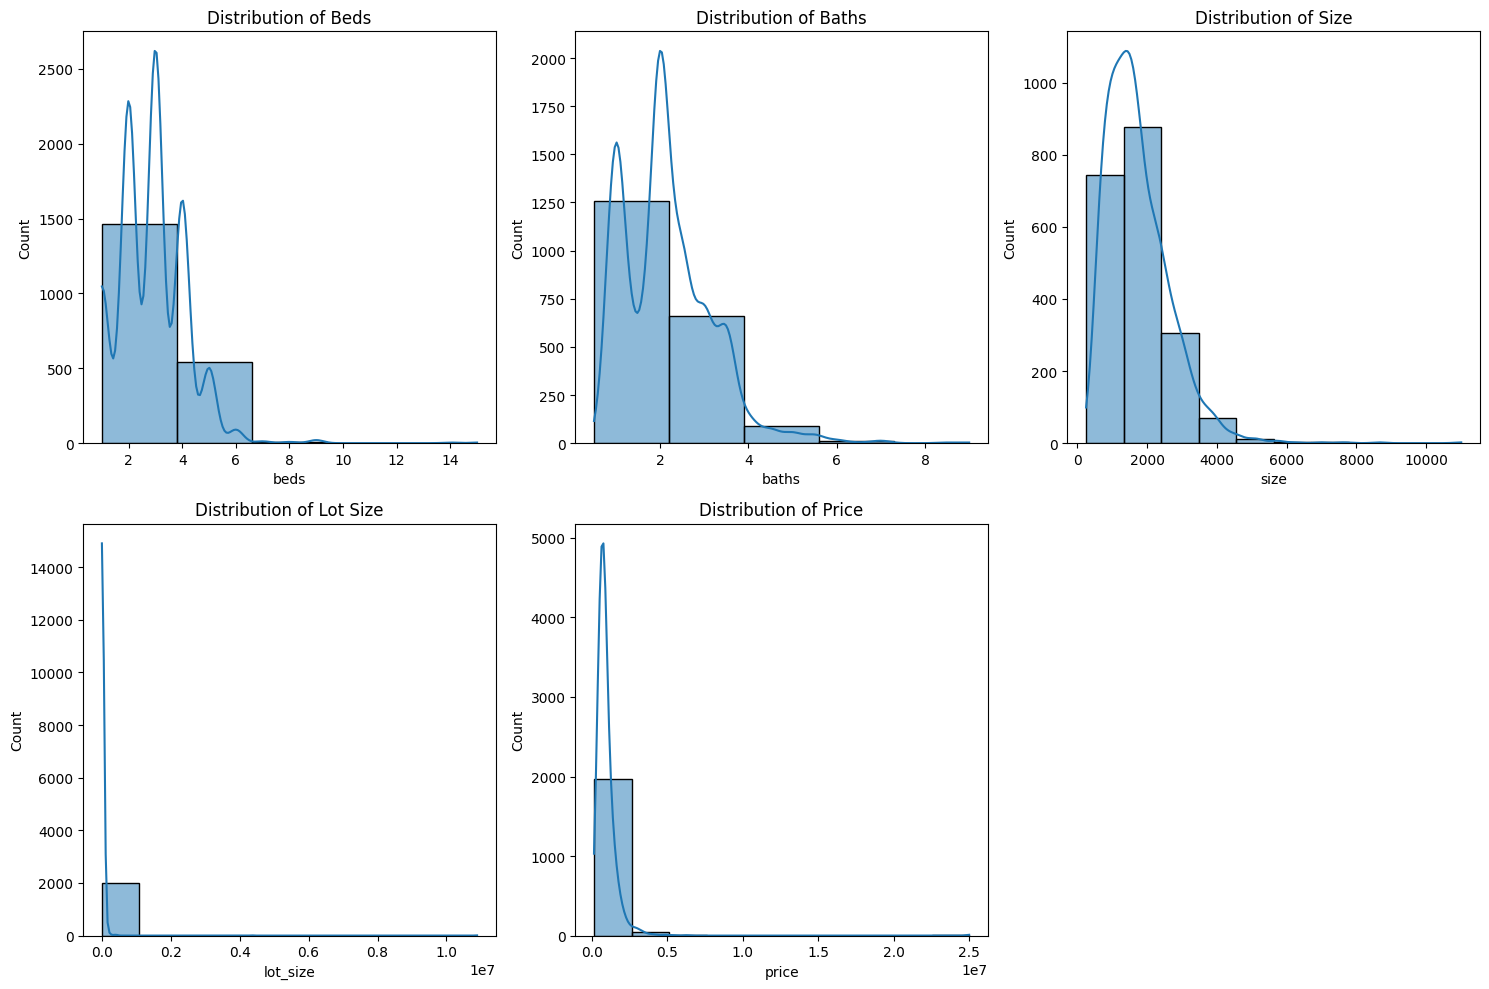

In [48]:
plt.figure(figsize=(15, 10))

# Histogram for 'beds'
plt.subplot(2, 3, 1)
sns.histplot(train['beds'], bins=5, kde=True)
plt.title('Distribution of Beds')

# Histogram for 'baths'
plt.subplot(2, 3, 2)
sns.histplot(train['baths'], bins=5, kde=True)
plt.title('Distribution of Baths')

# Histogram for 'size'
plt.subplot(2, 3, 3)
sns.histplot(train['size'], bins=10, kde=True)
plt.title('Distribution of Size')

# Histogram for 'lot_size'
plt.subplot(2, 3, 4)
sns.histplot(train['lot_size'], bins=10, kde=True)
plt.title('Distribution of Lot Size')

# Histogram for 'price'
plt.subplot(2, 3, 5)
sns.histplot(train['price'], bins=10, kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

#### For Test Data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

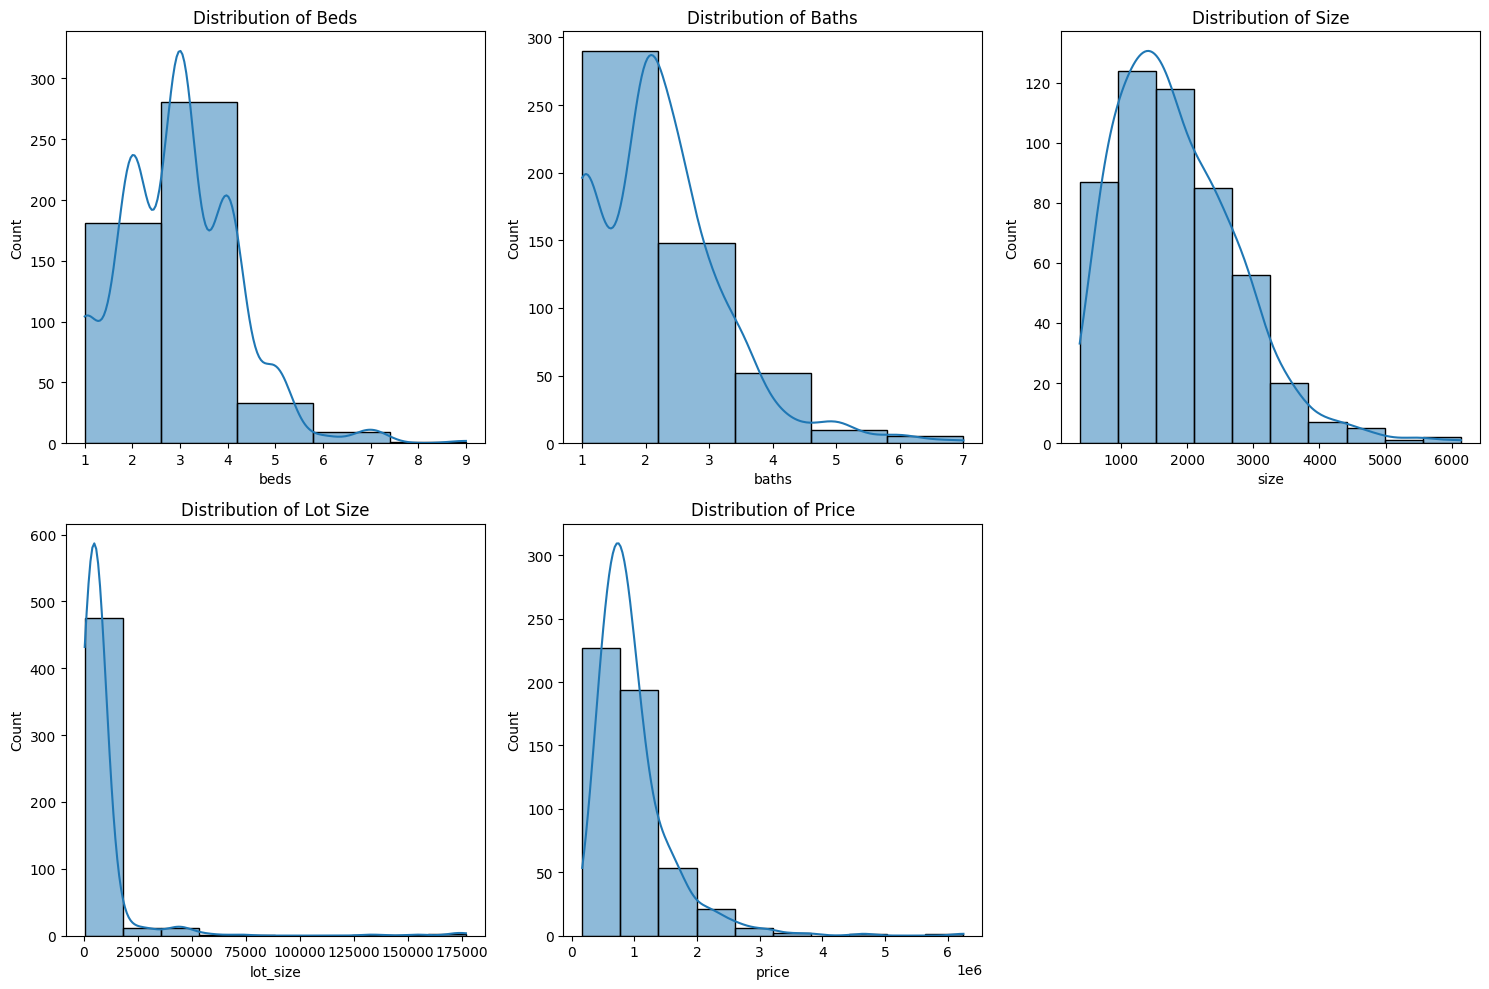

In [49]:
plt.figure(figsize=(15, 10))

# Histogram for 'beds'
plt.subplot(2, 3, 1)
sns.histplot(test['beds'], bins=5, kde=True)
plt.title('Distribution of Beds')

# Histogram for 'baths'
plt.subplot(2, 3, 2)
sns.histplot(test['baths'], bins=5, kde=True)
plt.title('Distribution of Baths')

# Histogram for 'size'
plt.subplot(2, 3, 3)
sns.histplot(test['size'], bins=10, kde=True)
plt.title('Distribution of Size')

# Histogram for 'lot_size'
plt.subplot(2, 3, 4)
sns.histplot(test['lot_size'], bins=10, kde=True)
plt.title('Distribution of Lot Size')

# Histogram for 'price'
plt.subplot(2, 3, 5)
sns.histplot(test['price'], bins=10, kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

### Scatter Plot against Price

#### For Train data

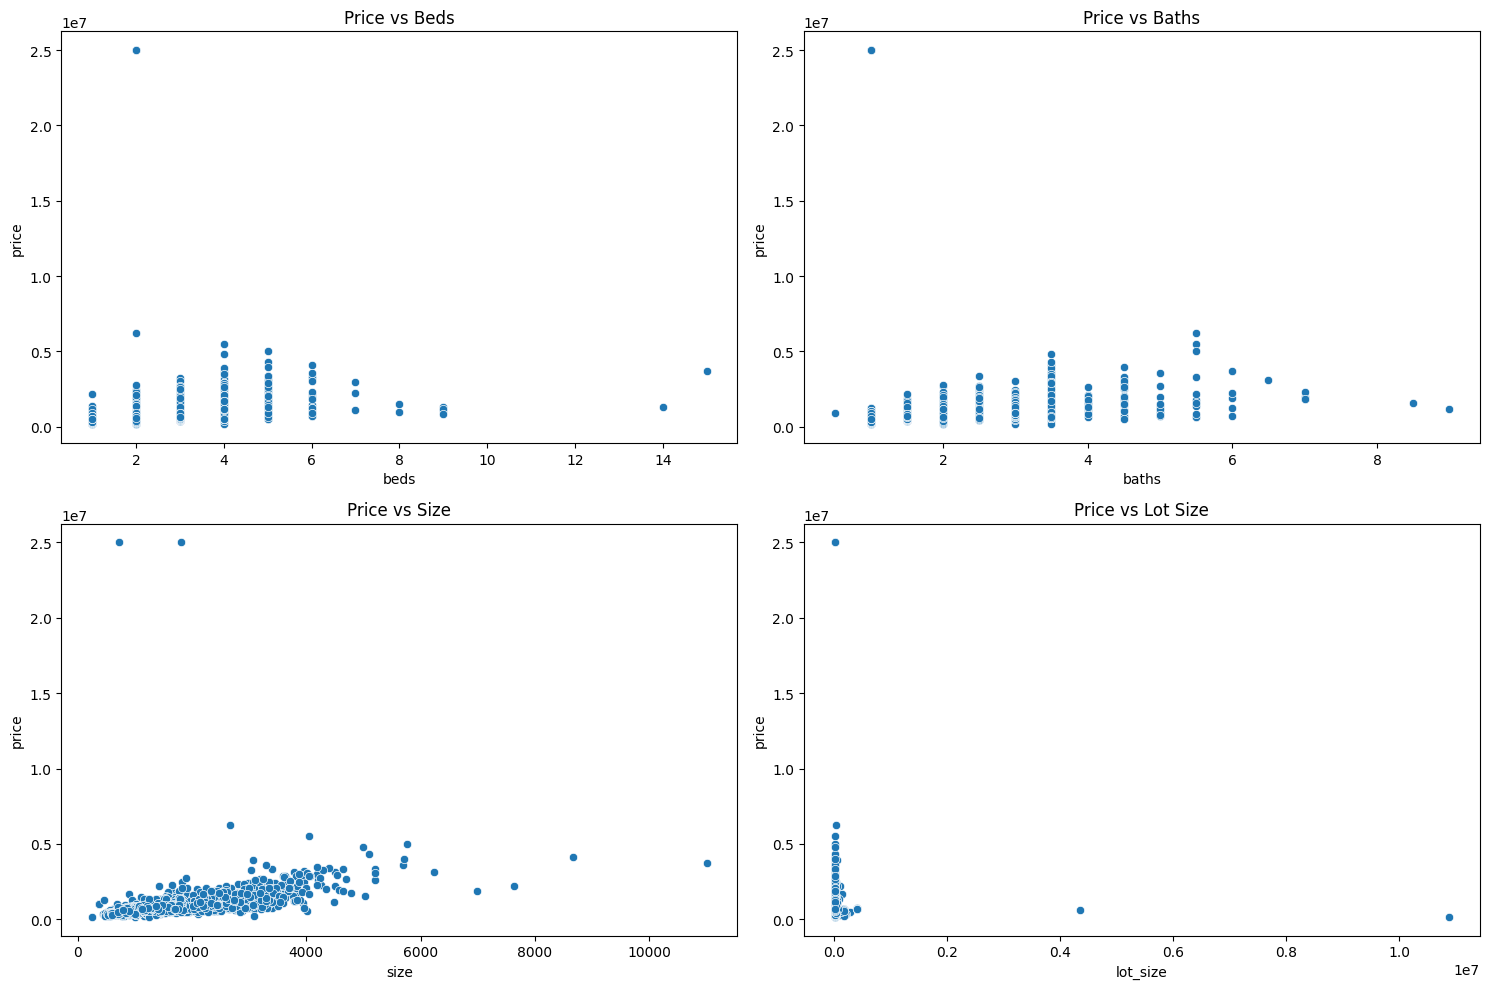

In [50]:
plt.figure(figsize=(15, 10))

# Scatter plot of 'beds' vs 'price'
plt.subplot(2, 2, 1)
sns.scatterplot(x='beds', y='price', data=train)
plt.title('Price vs Beds')

# Scatter plot of 'baths' vs 'price'
plt.subplot(2, 2, 2)
sns.scatterplot(x='baths', y='price', data=train)
plt.title('Price vs Baths')

# Scatter plot of 'size' vs 'price'
plt.subplot(2, 2, 3)
sns.scatterplot(x='size', y='price', data=train)
plt.title('Price vs Size')

# Scatter plot of 'lot_size' vs 'price'
plt.subplot(2, 2, 4)
sns.scatterplot(x='lot_size', y='price', data=train)
plt.title('Price vs Lot Size')

plt.tight_layout()
plt.show()


#### For Test data

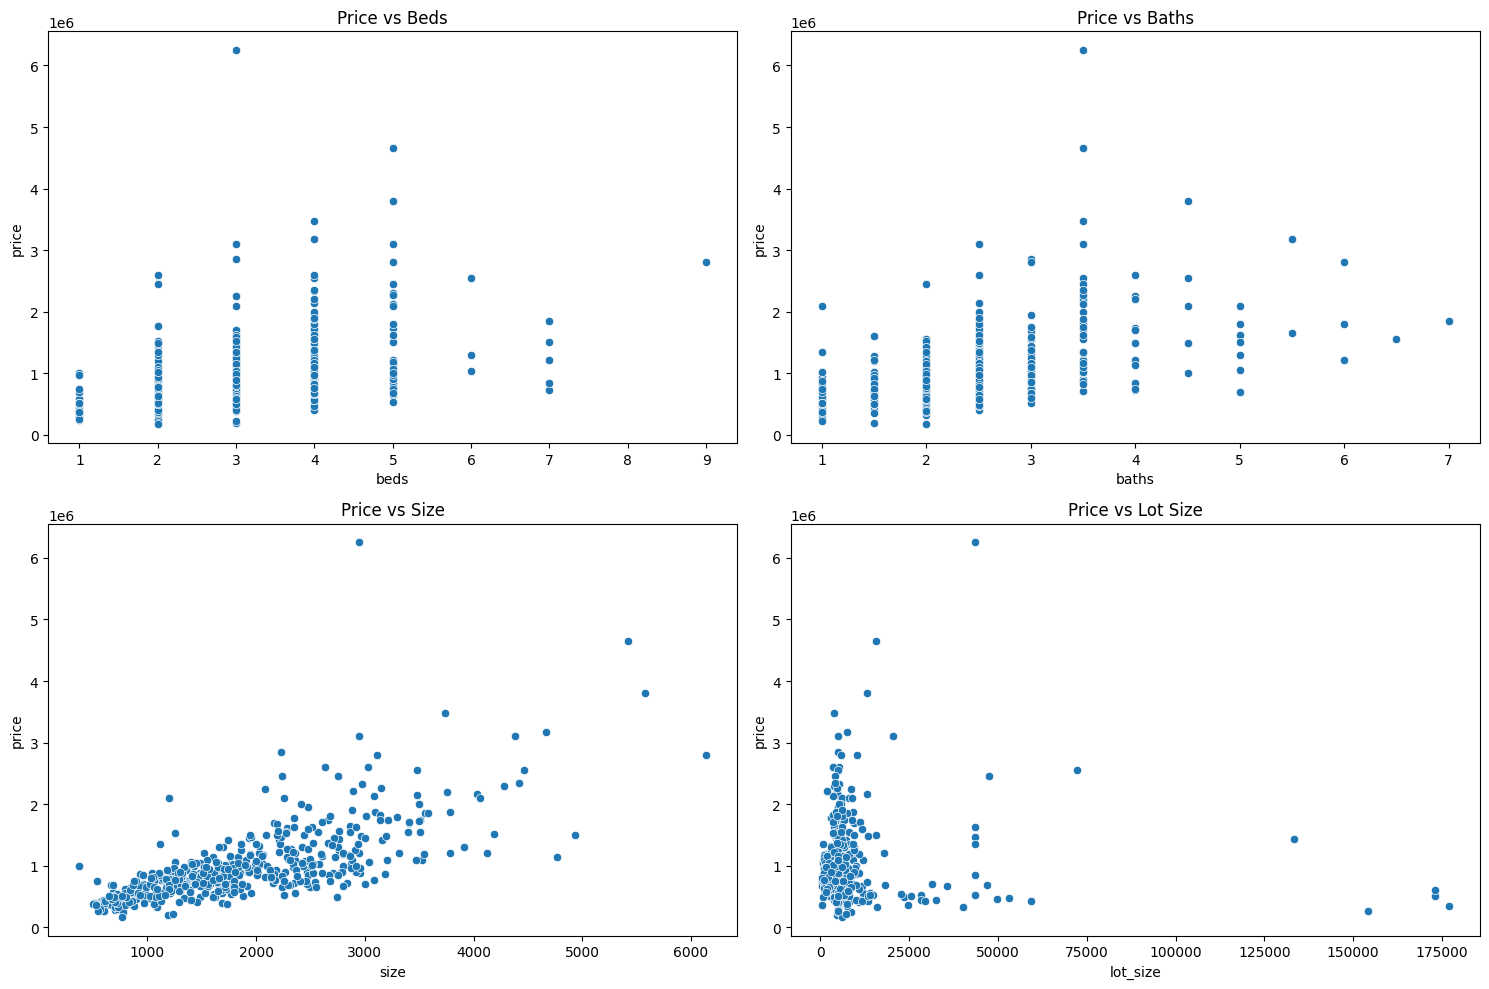

In [51]:
plt.figure(figsize=(15, 10))

# Scatter plot of 'beds' vs 'price'
plt.subplot(2, 2, 1)
sns.scatterplot(x='beds', y='price', data=test)
plt.title('Price vs Beds')

# Scatter plot of 'baths' vs 'price'
plt.subplot(2, 2, 2)
sns.scatterplot(x='baths', y='price', data=test)
plt.title('Price vs Baths')

# Scatter plot of 'size' vs 'price'
plt.subplot(2, 2, 3)
sns.scatterplot(x='size', y='price', data=test)
plt.title('Price vs Size')

# Scatter plot of 'lot_size' vs 'price'
plt.subplot(2, 2, 4)
sns.scatterplot(x='lot_size', y='price', data=test)
plt.title('Price vs Lot Size')

plt.tight_layout()
plt.show()


### Heatmaps

#### For Train data

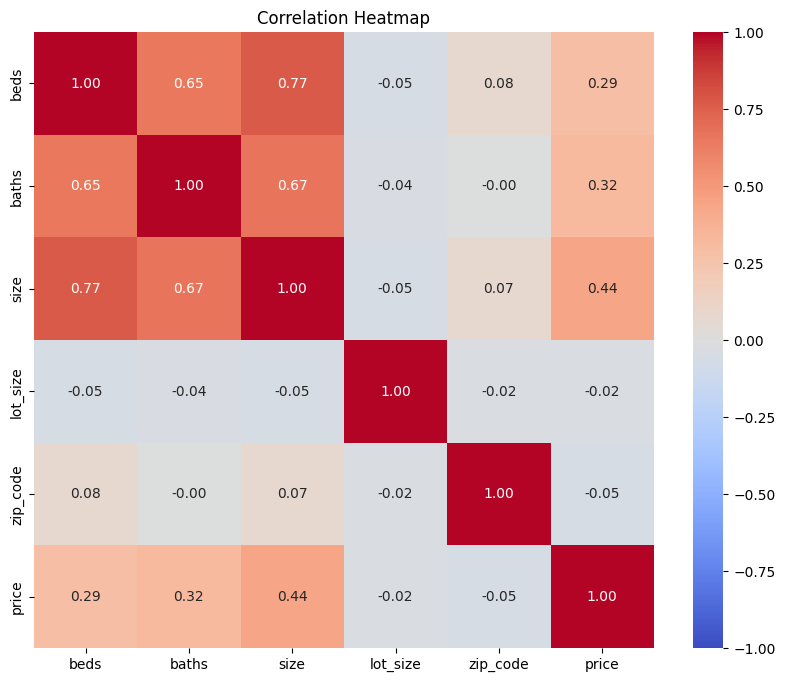

In [52]:
# Compute the correlation matrix
corr = train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


#### For Test data

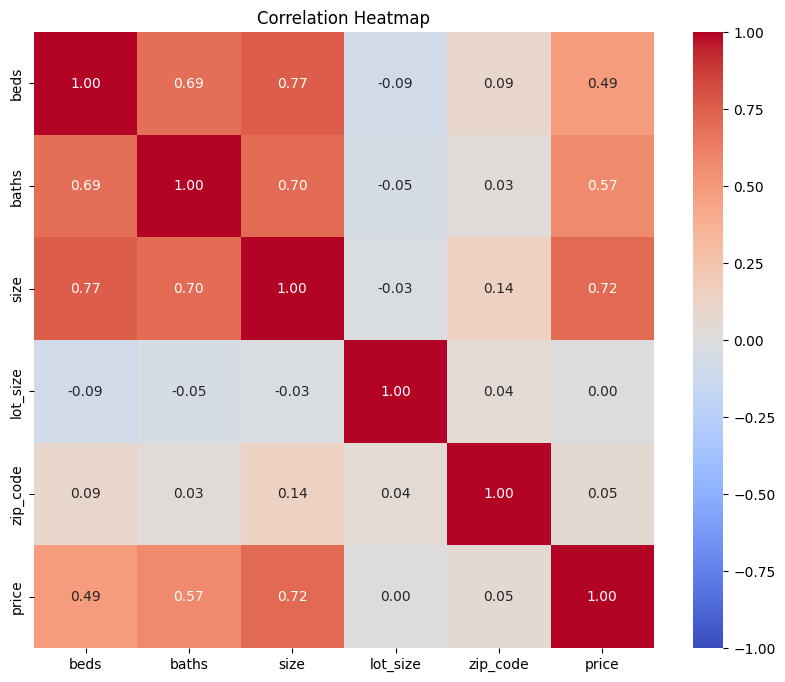

In [53]:
# Compute the correlation matrix
corr = test.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


As zip code is of no importance, we will drop it

In [99]:
train.drop('zip_code', axis = 1, inplace = True)
test.drop('zip_code', axis = 1, inplace = True)

## Model Development

Seperating X and y variables for each train and test data

In [100]:
X_train = train.drop('price', axis = 1)
X_test = test.drop('price', axis = 1)

In [101]:
y_train = train['price']
y_test = test['price']

### Model Training

#### Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
model = LinearRegression()

In [126]:
model.fit(X_train, y_train)

LinearRegression()

In [127]:
model.coef_

array([-1.10897468e+05,  6.97386303e+04,  5.21508511e+02, -1.94045504e-02])

In [128]:
model.intercept_

225011.84669564513

#### Model Evaluation

In [129]:
y_pred = model.predict(X_test)

In [148]:
model.score(X_test, y_test)

0.5312326247689867

#### Support Vector Regression

In [133]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [134]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [135]:
svr_model.fit(X_train, y_train)

SVR()

In [136]:
y_pred = svr_model.predict(X_test)

#### Model Evaluation

In [147]:
svr_model.score(X_test, y_test)

-0.08727714723974156

#### Random Forest Regression

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [140]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [141]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [142]:
y_pred = rf_model.predict(X_test)

#### Model Evaluation

In [146]:
rf_model.score(X_test, y_test)

-0.32458662561593377